In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # CUDA가 활성화 여부
print(torch.version.cuda)  # 설치된 CUDA 버전 출력
print(torch.cuda.get_device_name(0))  # 사용 중인 GPU
print("cuda" if torch.cuda.is_available() else "cpu")

2.6.0+cu118
True
11.8
NVIDIA GeForce RTX 3050
cuda


In [40]:
import pandas as pd
train_df = pd.read_csv('data/train_dataset.csv')
test_df = pd.read_csv('data/test_dataset.csv')

In [137]:
print(train_df.head())
print(test_df.head())

                                                text emotion situation
0  일은 왜 해도 해도 끝이 없을까? 화가 난다. 그냥 내가 해결하는 게 나아. 남들한...     E18       S06
1  이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나....     E18       S06
2  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...     E18       S06
3  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...     E18       S06
4  얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나. 상사인 나에게 ...     E18       S06
                                                text emotion situation
0  이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...     E31       S06
1  회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워. 나에게 너무 크...     E31       S06
2  상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워. 무섭게 생겼는데도 업무를 보려...     E31       S06
3  이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다. 첫 직장...     E31       S06
4  직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼. 내가 낯가림이 심해서 친해질 수...     E31       S06


In [139]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51628 entries, 0 to 51627
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       51628 non-null  object
 1   emotion    51628 non-null  object
 2   situation  51628 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       6640 non-null   object
 1   emotion    6640 non-null   object
 2   situation  6640 non-null   object
dtypes: object(3)
memory usage: 155.8+ KB
None


In [141]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from collections import Counter

# 텍스트 데이터를 TF-IDF 벡터로 변환
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['text'])

# 'emotion'과 'situation'을 결합하여 새로운 라벨을 만듭니다.
train_df['combined_label'] = train_df['emotion'] + "_" + train_df['situation']

# 결합된 라벨
y_combined = train_df['combined_label']

# SMOTE 오버샘플링 (소수 클래스 오버샘플링)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y_combined)

# 오버샘플링 후 라벨을 'emotion'과 'situation'으로 분리
y_smote_emotion, y_smote_situation = zip(*[label.split('_') for label in y_smote])

# 오버샘플링된 데이터로 새로운 데이터프레임 생성
pre_train_df = pd.DataFrame({
    'text': vectorizer.inverse_transform(X_smote),
    'emotion': y_smote_emotion,
    'situation': y_smote_situation
})

# 오버샘플링된 데이터프레임 확인
print("\n오버샘플링된 데이터 (pre_train_df):")
print(pre_train_df.head())

# 오버샘플링 후 감정 클래스 분포 확인
print(f"\n오버샘플링 후 감정 클래스 분포: {Counter(y_smote_emotion)}")

# 오버샘플링 후 상황 클래스 분포 확인
print(f"\n오버샘플링 후 상황 클래스 분포: {Counter(y_smote_situation)}")



오버샘플링된 데이터 (pre_train_df):
                                                text emotion situation
0  [일은, 해도, 끝이, 없을까, 화가, 난다, 그냥, 내가, 해결하는, 나아, 남들...     E18       S06
1  [화가, 이번, 달에, 급여가, 깎였어, 물가는, 오르는데, 월급만, 자꾸, 깎이니...     E18       S06
2  [같아, 회사에, 신입이, 들어왔는데, 말투가, 거슬려, 그런, 애를, 매일, 봐야...     E18       S06
3  [직장에서, 막내라는, 이유로, 나에게만, 온갖, 심부름을, 시켜, 일도, 많은, ...     E18       S06
4  [화가, 내가, 너무, 매일, 얼마, 입사한, 신입사원이, 나를, 무시하는, 같아서...     E18       S06

오버샘플링 후 감정 클래스 분포: Counter({'E18': 3288, 'E66': 3288, 'E37': 3288, 'E35': 3288, 'E50': 3288, 'E25': 3288, 'E64': 3288, 'E42': 3288, 'E49': 3288, 'E56': 3288, 'E10': 3288, 'E30': 3288, 'E22': 3288, 'E40': 3288, 'E19': 3288, 'E32': 3288, 'E20': 3288, 'E62': 3288, 'E68': 3288, 'E21': 3288, 'E15': 3288, 'E16': 3288, 'E67': 3288, 'E47': 3288, 'E54': 3288, 'E26': 3288, 'E53': 3288, 'E24': 3288, 'E51': 3288, 'E12': 3288, 'E23': 3288, 'E57': 3288, 'E58': 3288, 'E69': 3288, 'E60': 3288, 'E11': 3288, 'E52': 3288, 'E36': 3288, 'E55': 3288, 'E59': 328

In [142]:
pre_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197280 entries, 0 to 197279
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       197280 non-null  object
 1   emotion    197280 non-null  object
 2   situation  197280 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [143]:
# 각 행의 텍스트 리스트에 대해 단어들을 공백으로 연결하여 문장으로 만듦
pre_train_df['text'] = pre_train_df['text'].apply(lambda x: " ".join(x))

In [144]:
train_df = pre_train_df.copy()

In [145]:
train_df.head() # 

,text,emotion,situation
0,일은 해도 끝이 없을까 화가 난다 그냥 내가 해결하는 나아 남들한테 부담 주고 싶지...,E18,S06
1,화가 이번 달에 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 최대한 지...,E18,S06
2,같아 회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까...,E18,S06
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 정말 분하고 섭섭해...,E18,S06
4,화가 내가 너무 매일 얼마 입사한 신입사원이 나를 무시하는 같아서 상사인 나에게 먼...,E18,S06


In [146]:
import MeCab

# mecabrc 경로를 명확하게 지정
mecab = MeCab.Tagger("-r C:/mecab/etc/mecabrc")

In [147]:
import requests

# 한국어 불용어 리스트 가져오기
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/master/stopwords-ko.txt"
response = requests.get(url)
korean_stopwords = set(response.text.split("\n"))

In [12]:
# def preprocess_text_with_adverbs_and_verbs(text):
#     # 텍스트가 비어있는 경우
#     if not isinstance(text, str):  
#         return ""
    
#     parsed_text = mecab.parse(text).split("\n")[:-2]  # 마지막 줄(EOS, 공백) 제거
#     tokens = [line.split("\t") for line in parsed_text if "\t" in line]
    
#     # 품사 필터링 (명사, 형용사, 부사, 동사만 남기기)
#     keywords = []
#     for token in tokens:
#         if len(token) < 2:
#             continue
#         word, features = token[0], token[1].split(",")
#         tag = features[0]  
#         lemma = features[-3]  # 원형을 추출

#         # 명사(NNG, NNP) 그대로 추가
#         if tag in ['NNG', 'NNP']:
#             keywords.append(word)

#         # 형용사(VA) 원형 변환 및 추가, 원형 변환이 안되면 제외
#         elif tag == 'VA':
#             if lemma != '*' and lemma != '' and lemma != word:
#                 keywords.append(lemma)
#             # 형용사의 경우 원형 변환이 안 되면 제외
#             else:
#                 continue

#         # 부사(MAG)는 감정의 강도나 상태를 강조하므로 추가
#         elif tag == 'MAG':  # 부사 태그
#             keywords.append(word)
        
#         # 동사(VV) 원형 변환 및 추가, 원형 변환이 안되면 제외
#         elif tag == 'VV':  # 동사 태그
#             if lemma != '*' and lemma != '' and lemma != word:
#                 keywords.append(lemma)
#             # 동사의 경우 원형 변환이 안 되면 제외
#             else:
#                 continue

#     # 중복 단어 제거 & 불용어 제거
#     keywords = list(dict.fromkeys(keywords))  # 중복 제거
#     keywords = [word for word in keywords if word not in korean_stopwords and len(word) > 1]  # 불용어 제거
    
#     return " ".join(keywords)

# # MeCab 적용하여 텍스트 전처리
# train_df['text'] = train_df['text'].apply(preprocess_text_with_adverbs_and_verbs)



In [13]:
# train_df['text'].loc[51:100]

In [148]:
from konlpy.tag import Okt
from tqdm import tqdm

# Okt 객체 초기화
okt = Okt()

# 진행 상황 표시를 위해 tqdm을 활성화
tqdm.pandas()

def preprocess_text_with_okt(text):
    if not isinstance(text, str):  # NaN 처리
        return ""
    
    # 형태소 분석
    parsed_text = okt.pos(text)
    
    keywords = []
    for word, tag in parsed_text:
        # 명사(NNG, NNP) 그대로 추가
        if tag in ['Noun', 'NNP']:
            keywords.append(word)
        
        # 형용사 원형 추가
        elif tag == 'Adjective':
            keywords.append(word)  # '형용사'는 원형이 해당 형태
        
        # 동사 원형 추가
        elif tag == 'Verb':
            keywords.append(word)  # '동사'도 원형이 해당 형태
        
        # 부사 추가
        elif tag == 'Adverb':
            keywords.append(word)
    
    # 중복 단어 제거 및 불용어 제거
    keywords = list(dict.fromkeys(keywords))  # 중복 제거
    keywords = [word for word in keywords if word not in korean_stopwords and len(word) > 1]  # 불용어 제거
    
    return " ".join(keywords)

# 진행상황을 표시하며 apply 적용
train_df['text'] = train_df['text'].progress_apply(preprocess_text_with_okt)


100%|█████████████████████████████████████████████████████████████████████████| 197280/197280 [29:54<00:00, 109.91it/s]


In [149]:
train_df.loc[51:100]

,text,emotion,situation
51,너무 정말 하는데 많이 요즘 취업 해야 없어서 걱정 모르겠어 구직 자리 슬퍼 살아야...,E20,S06
52,같아 않아서 좋은 많이 요즘 취업 좋지 시장 직장 없는 지원 곳도 떨어지고 막막해,E20,S06
53,너무 같아 취업 회사 다시는 슬퍼 해고 당했어,E20,S06
54,한다고 직장 이제 막막해 가깝게 지내던 퇴사 했어 입사 가르쳐 주셨던 나가야 생각 하니,E20,S06
55,너무 같아 정말 않아서 고민 않는 진로 요즘 때문 속상해 해야 취업 문제 많아 울적...,E20,S06
56,너무 슬퍼 없는 떨어지고 고객 폭언 자존감 사람 감정 사람인 참을 상황 이르,E20,S06
57,많이 열심히 됐어 슬퍼 올해 진급 예정 이었는데 기대 해서인지 실망 크네 하다 보면...,E20,S06
58,같아서 면접 취업 봤는데 모르겠어 슬퍼 망친 떨어지면 어떡하지,E20,S06
59,너무 회사 코로나바이러스 때문 이럴 하고 슬퍼 해고 됐어 먹고 자려고 했던 운동,E20,S06
60,같아 회사 오늘 입사 면접 봤어 취업 있겠어,E62,S06


In [161]:
# train_df.to_csv('data/250312_train_df.csv')

In [ ]:
# from konlpy.tag import Kkma

# kkma = Kkma()

# def preprocess_text_with_kkma(text):
#     if not isinstance(text, str):  # NaN 처리
#         return ""
    
#     # 형태소 분석
#     parsed_text = kkma.pos(text)
    
#     keywords = []
#     for word, tag in parsed_text:
#         # 명사(NNG, NNP) 그대로 추가
#         if tag in ['NNG', 'NNP']:
#             keywords.append(word)
        
#         # 형용사(VA) 원형 변환 추가
#         elif tag == 'VA':
#             keywords.append(word)  # 'VA'형용사는 원형이 바로 해당 형태
        
#         # 동사(VV) 원형 변환 추가
#         elif tag == 'VV':
#             keywords.append(word)  # 'VV'형용사도 원형이 바로 해당 형태
        
#         # 부사(MAG) 추가
#         elif tag == 'MAG':
#             keywords.append(word)
    
#     # 중복 단어 제거 및 불용어 제거
#     keywords = list(dict.fromkeys(keywords))  # 중복 제거
#     keywords = [word for word in keywords if word not in korean_stopwords and len(word) > 1]  # 불용어 제거
    
#     return " ".join(keywords)

# train_df['text'] = train_df['text'].apply(preprocess_text_with_kkma)


In [80]:
import re

def clean_text(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text)  # 한글, 영어, 숫자, 공백만 유지
    text = re.sub(r"\s+", " ", text).strip()  # 중복 공백 제거
    return text

train_df["text"] = train_df["text"].apply(clean_text)
test_df["text"] = test_df["text"].apply(clean_text)


In [82]:
train_df.head()

,text,emotion,situation
0,없다 그냥 해결 부담,E18,S06
1,급여 물가 월급 자꾸 너무 최대한 지출 억제 고정 없다,E18,S06
2,회사 신입 말투 매일 생각 스트레스 사람 억지로 거리 예의,E18,S06
3,직장 막내 이유 심부름 많다 정말 분하다 사람 이야기 방해,E18,S06
4,입사 신입 사원 무시 너무 상사 먼저 인사 매일,E18,S06


In [6]:
train_df = pd.read_csv('data/250312_train_df.csv')

In [8]:
from sklearn.preprocessing import LabelEncoder

# 감정 라벨 인코딩
emotion_encoder = LabelEncoder()
train_df["emotion"] = emotion_encoder.fit_transform(train_df["emotion"])
test_df["emotion"] = emotion_encoder.transform(test_df["emotion"])

# 상황 라벨 인코딩
situation_encoder = LabelEncoder()
train_df["situation"] = situation_encoder.fit_transform(train_df["situation"])
test_df["situation"] = situation_encoder.transform(test_df["situation"])


In [10]:
train_df.head()

,Unnamed: 0,text,emotion,situation
0,0,해도 없을까 화가 난다 그냥 해결 하는 나아 부담 주고 싶지도 않고,8,5
1,1,화가 급여 깎였어 물가 오르는데 월급 자꾸 깎이니까 너무 최대한 지출 억제 해야겠어...,8,5
2,2,같아 회사 신입 들어왔는데 말투 거슬려 그런 매일 봐야 한다고 생각 하니까 스트레스...,8,5
3,3,직장 막내 이유 온갖 심부름 시켜 일도 많은 정말 분하고 섭섭해 사람 솔직하게 이야...,8,5
4,4,화가 너무 매일 입사 신입사원 나를 무시 하는 같아서 상사 먼저 인사 하지 않아서 한다고,8,5


In [42]:
train_df = pd.read_csv('data/250312_pre_train_df.csv', index_col=False)
train_df.drop(columns=['Unnamed: 0'], inplace=True)	
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

In [44]:
train_df.head()

,text,emotion,situation,word_count
0,해도 없을까 화가 난다 그냥 해결 하는 나아 부담 주고 싶지도 않고,8,5,12
1,화가 급여 깎였어 물가 오르는데 월급 자꾸 깎이니까 너무 최대한 지출 억제 해야겠어...,8,5,18
2,같아 회사 신입 들어왔는데 말투 거슬려 그런 매일 봐야 한다고 생각 하니까 스트레스...,8,5,24
3,직장 막내 이유 온갖 심부름 시켜 일도 많은 정말 분하고 섭섭해 사람 솔직하게 이야...,8,5,19
4,화가 너무 매일 입사 신입사원 나를 무시 하는 같아서 상사 먼저 인사 하지 않아서 한다고,8,5,15


In [173]:
train_df['word_count'].mean()

30.108708434712085

In [46]:
# 단어 수가 10개 이하인 행 삭제
train_df = train_df[train_df['word_count'] >= 30]
# 'word_count' 컬럼 삭제 (필요 없으므로)
train_df = train_df.drop(columns=['word_count'])


In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106696 entries, 144 to 197279
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       106696 non-null  object
 1   emotion    106696 non-null  int64 
 2   situation  106696 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ MB


In [50]:
import torch
import torch.nn as nn
from transformers import BertModel, AutoTokenizer

# ✅ 1. KoBERT 커스텀 모델 정의 (감정 + 상황 다중 분류)
class KoBERTMultiOutput(nn.Module):
    def __init__(self, model_name, num_emotions, num_situations):
        super(KoBERTMultiOutput, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)  # KoBERT 기본 모델
        self.dropout = nn.Dropout(0.2)  # 드롭아웃 레이어 추가
        self.emotion_classifier = nn.Linear(self.bert.config.hidden_size, num_emotions)  # 감정 분류기
        self.situation_classifier = nn.Linear(self.bert.config.hidden_size, num_situations)  # 상황 분류기

    def forward(self, input_ids, attention_mask, token_type_ids):
        # Bert 모델을 통해 출력값을 얻음
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = self.dropout(outputs.pooler_output)  # BERT 출력에서 pooling된 벡터에 드롭아웃 적용

        # 감정과 상황을 위한 로짓 분리
        emotion_logits = self.emotion_classifier(pooled_output)
        situation_logits = self.situation_classifier(pooled_output)

        # 두 가지 로짓 반환
        return emotion_logits, situation_logits


In [180]:
print(len(train_df["emotion"].unique()))
print(len(train_df["situation"].unique()))

60
12


In [ ]:
import time
import torch
import torch.nn as nn
from tqdm import tqdm
from transformers import AdamW, get_scheduler
import matplotlib.pyplot as plt
import os
from transformers import AutoTokenizer
from datetime import datetime
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


# ✅ 2. 모델 생성 (train_df의 감정, 상황 레이블 수에 맞춰 설정)
num_emotions = len(train_df["emotion"].unique())  # 감정 클래스 개수
num_situations = len(train_df["situation"].unique())  # 상황 클래스 개수
model_name = "monologg/kobert"

model = KoBERTMultiOutput(model_name, num_emotions, num_situations)  # 모델 초기화

# ✅ 3. 디바이스 설정 (GPU 또는 CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
model.to(device)  # 모델을 설정한 디바이스로 이동

# ✅ 4. 클래스 가중치 계산
emotion_labels = train_df['emotion'].values
situation_labels = train_df['situation'].values

# 감정과 상황에 대한 클래스 가중치 계산
emotion_class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(emotion_labels), y=emotion_labels)
situation_class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(situation_labels), y=situation_labels)

# 가중치를 텐서로 변환
emotion_weights = torch.tensor(emotion_class_weights, dtype=torch.float).to(device)
situation_weights = torch.tensor(situation_class_weights, dtype=torch.float).to(device)

# ✅ 5. 손실 함수 설정 (가중치 적용)
loss_fn = nn.CrossEntropyLoss(weight=emotion_weights)  # 감정 클래스 가중치 적용
situation_loss_fn = nn.CrossEntropyLoss(weight=situation_weights)  # 상황 클래스 가중치 적용

# ✅ 6. 옵티마이저 및 학습률 스케줄러 설정
optimizer = AdamW(model.parameters(), lr=1e-5)  # AdamW 옵티마이저 사용
num_training_steps = len(train_dataloader) * 20  # 학습할 총 스텝 수 
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)  # 학습률 스케줄러 설정

# ✅ 7. 모델 학습
num_epochs = 20
train_accuracy_history = []  # 정확도 기록
train_loss_history = []  # 손실값 기록

# 얼리스탑을 위한 변수 초기화
best_accuracy = 0.0  # 가장 좋은 정확도
patience = 5  # 개선되지 않아도 허용할 에포크 수
early_stopping_counter = 0  # 얼리스탑 카운터

# 모델 체크포인트 저장을 위한 경로 설정
model_path = "kobert_emotion_situation"
os.makedirs(model_path, exist_ok=True)  # 디렉토리가 없으면 생성


# ✅ 8. 학습 시작
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    total_loss = 0
    correct = 0
    total = 0
    epoch_accuracy = 0
    start_time = time.time()

    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)

    for batch in progress_bar:
        # 배치 데이터를 디바이스로 이동
        input_ids, attention_mask, token_type_ids, emotion_labels, situation_labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        emotion_labels = emotion_labels.to(device)
        situation_labels = situation_labels.to(device)

        # Forward pass
        emotion_logits, situation_logits = model(input_ids, attention_mask, token_type_ids)

        # 손실 계산 (가중치 적용)
        emotion_loss = loss_fn(emotion_logits, emotion_labels)
        situation_loss = situation_loss_fn(situation_logits, situation_labels)

        loss = emotion_loss + situation_loss

        # Backward pass
        optimizer.zero_grad()  # 기울기 초기화
        loss.backward()  # 기울기 계산
        optimizer.step()  # 최적화
        lr_scheduler.step()  # 학습률 스케줄러 업데이트

        total_loss += loss.item()  # 손실값 누적

        # 정확도 계산
        emotion_pred = torch.argmax(emotion_logits, dim=1)
        situation_pred = torch.argmax(situation_logits, dim=1)

        correct += (emotion_pred == emotion_labels).sum().item()
        correct += (situation_pred == situation_labels).sum().item()
        total += emotion_labels.size(0) + situation_labels.size(0)

        # 정확도 업데이트
        epoch_accuracy = correct / total

        # 진행상황을 바에 손실값과 정확도 표시
        progress_bar.set_postfix({"Loss": loss.item(), "Accuracy": epoch_accuracy})

    avg_loss = total_loss / len(train_dataloader)  # 평균 손실 계산
    epoch_accuracy = correct / total  # 에포크별 정확도 계산

    # 에포크별 손실과 정확도 기록
    train_loss_history.append(avg_loss)
    train_accuracy_history.append(epoch_accuracy)

    epoch_time = time.time() - start_time
    print(f"✅ Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f} - Accuracy: {epoch_accuracy:.4f} - Time: {epoch_time:.2f} sec")

    # 얼리스탑 조건: 성능이 개선되지 않으면 학습을 중지
    if epoch_accuracy > best_accuracy:
        best_accuracy = epoch_accuracy
        early_stopping_counter = 0
        # 현재 모델을 체크포인트로 저장
        torch.save(model.state_dict(), f"{model_path}/best_model.pth")
        print("✅ 모델이 개선되어 체크포인트 저장!")
    else:
        early_stopping_counter += 1
        print(f"❌ 모델 성능이 개선되지 않았습니다. (이미 개선된 횟수: {early_stopping_counter})")

    # 얼리스탑 발동 여부 확인
    if early_stopping_counter >= patience:
        print(f"⚠️ 얼리스탑 발동! 성능이 개선되지 않았습니다. (최대 {patience} 에포크)")
        break  # 학습 중지

print("🎉 KoBERT 학습 완료!")

# ✅ 모델 저장 (최종 모델 가중치 및 학습 기록 포함)
torch.save(model.state_dict(), f"{model_path}/final_model.pth")  # 최종 모델 저장
torch.save({'train_loss': train_loss_history, 'train_accuracy': train_accuracy_history}, f"{model_path}/history.pth")  # 학습 기록


True


C:\Users\kj\anaconda3\Lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/20: 100%|███████████████████████████████████████| 6669/6669 [31:31<00:00,  3.53it/s, Loss=2.75, Accuracy=0.433]


✅ Epoch 1/20 - Loss: 4.4332 - Accuracy: 0.4330 - Time: 1891.28 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 2/20: 100%|███████████████████████████████████████| 6669/6669 [31:36<00:00,  3.52it/s, Loss=2.66, Accuracy=0.678]


✅ Epoch 2/20 - Loss: 2.6484 - Accuracy: 0.6776 - Time: 1896.74 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 3/20: 100%|████████████████████████████████████████| 6669/6669 [31:09<00:00,  3.57it/s, Loss=2.1, Accuracy=0.793]


✅ Epoch 3/20 - Loss: 1.6668 - Accuracy: 0.7927 - Time: 1869.48 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 4/20: 100%|██████████████████████████████████████| 6669/6669 [30:57<00:00,  3.59it/s, Loss=0.421, Accuracy=0.867]


✅ Epoch 4/20 - Loss: 1.0776 - Accuracy: 0.8673 - Time: 1857.22 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 5/20: 100%|██████████████████████████████████████| 6669/6669 [30:57<00:00,  3.59it/s, Loss=0.385, Accuracy=0.917]


✅ Epoch 5/20 - Loss: 0.6894 - Accuracy: 0.9171 - Time: 1857.53 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 6/20: 100%|██████████████████████████████████████| 6669/6669 [30:58<00:00,  3.59it/s, Loss=0.138, Accuracy=0.947]


✅ Epoch 6/20 - Loss: 0.4459 - Accuracy: 0.9475 - Time: 1858.87 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 7/20: 100%|█████████████████████████████████████| 6669/6669 [30:59<00:00,  3.59it/s, Loss=0.0323, Accuracy=0.966]


✅ Epoch 7/20 - Loss: 0.2948 - Accuracy: 0.9658 - Time: 1859.01 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 8/20: 100%|███████████████████████████████████████| 6669/6669 [30:58<00:00,  3.59it/s, Loss=0.29, Accuracy=0.977]


✅ Epoch 8/20 - Loss: 0.2042 - Accuracy: 0.9771 - Time: 1858.78 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 9/20: 100%|██████████████████████████████████████| 6669/6669 [30:59<00:00,  3.59it/s, Loss=0.514, Accuracy=0.984]


✅ Epoch 9/20 - Loss: 0.1416 - Accuracy: 0.9844 - Time: 1859.72 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 10/20: 100%|███████████████████████████████████████| 6669/6669 [30:58<00:00,  3.59it/s, Loss=0.3, Accuracy=0.989]


✅ Epoch 10/20 - Loss: 0.1034 - Accuracy: 0.9894 - Time: 1858.66 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 11/20: 100%|████████████████████████████████████| 6669/6669 [30:59<00:00,  3.59it/s, Loss=0.0495, Accuracy=0.992]


✅ Epoch 11/20 - Loss: 0.0787 - Accuracy: 0.9920 - Time: 1859.19 sec
✅ 모델이 개선되어 체크포인트 저장!


Epoch 12/20:  19%|███████▎                              | 1286/6669 [05:56<24:51,  3.61it/s, Loss=0.14, Accuracy=0.995]

NameError: name 'num_epochs' is not defined

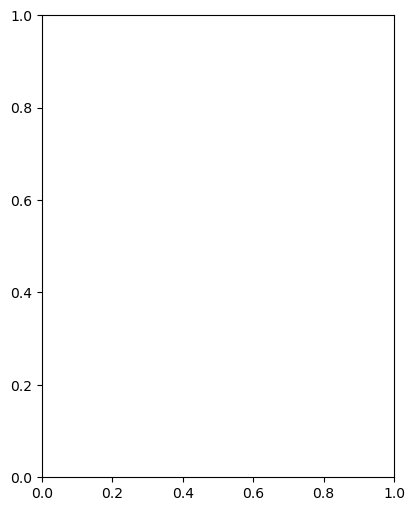

In [18]:
import matplotlib.pyplot as plt

# ✅ 학습 기록 시각화
plt.figure(figsize=(10, 6))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracy_history, marker='o', color='b', label="Train Accuracy")
plt.title("Train Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_loss_history, marker='x', color='r', label="Train Loss")
plt.title("Train Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
import torch
import torch.nn as nn
from transformers import BertModel, AutoTokenizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


# ✅ 2. 감정과 상황의 클래스 수 계산
num_emotions = len(train_df["emotion"].unique())  # 감정 클래스 개수
num_situations = len(train_df["situation"].unique())  # 상황 클래스 개수

# ✅ 3. 모델 초기화
model_name = "monologg/kobert"  # KoBERT 모델명
model = KoBERTMultiOutput(model_name, num_emotions, num_situations)  # num_emotions, num_situations 정의 완료

# ✅ 4. device 설정 (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # CUDA (GPU) 사용 가능 여부 확인
model.to(device)  # 모델을 해당 device로 이동

# 모델 체크포인트 불러오기
model.load_state_dict(torch.load("kobert_emotion_situation/250312_best_model.pth"))
model.to(device)  # 다시 device로 모델 이동

# ✅ 5. 학습 기록 불러오기
history = torch.load("kobert_emotion_situation/250312_history.pth", weights_only=True)
train_loss_history = history['train_loss']
train_accuracy_history = history['train_accuracy']

# ✅ 6. 테스트 데이터셋 준비 (test_dataloader)
test_texts = test_df["text"].tolist()  # 'text' 컬럼에 테스트 데이터가 있다고 가정
test_encodings = tokenizer(test_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")

emotion_labels_test = emotion_encoder.transform(test_df['emotion'].values)  # 감정 라벨
situation_labels_test = situation_encoder.transform(test_df['situation'].values)  # 상황 라벨

# 텐서로 변환
emotion_labels_test = torch.tensor(emotion_labels_test)
situation_labels_test = torch.tensor(situation_labels_test)

# Test Dataset과 DataLoader 생성
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_encodings['token_type_ids'],
                             emotion_labels_test, situation_labels_test)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)


# ✅ 7. 모델 평가 함수 (F1-Score와 Exact Match 추가)
def evaluate_model(model, test_dataloader, loss_fn, device, emotion_encoder, situation_encoder):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_emotion_preds = []
    all_situation_preds = []
    all_emotion_labels = []
    all_situation_labels = []

    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, token_type_ids, emotion_labels, situation_labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            emotion_labels = emotion_labels.to(device)
            situation_labels = situation_labels.to(device)

            emotion_logits, situation_logits = model(input_ids, attention_mask, token_type_ids)
            loss = loss_fn(emotion_logits, emotion_labels) + loss_fn(situation_logits, situation_labels)

            total_loss += loss.item()

            emotion_pred = torch.argmax(emotion_logits, dim=1)
            situation_pred = torch.argmax(situation_logits, dim=1)

            correct += (emotion_pred == emotion_labels).sum().item()
            correct += (situation_pred == situation_labels).sum().item()
            total += emotion_labels.size(0) + situation_labels.size(0)

            all_emotion_preds.extend(emotion_pred.cpu().numpy())
            all_situation_preds.extend(situation_pred.cpu().numpy())
            all_emotion_labels.extend(emotion_labels.cpu().numpy())
            all_situation_labels.extend(situation_labels.cpu().numpy())

    avg_loss = total_loss / len(test_dataloader)
    accuracy = correct / total

    # 감정과 상황에 대해 F1-Score 계산
    emotion_f1 = f1_score(all_emotion_labels, all_emotion_preds, average='weighted')
    situation_f1 = f1_score(all_situation_labels, all_situation_preds, average='weighted')

    # Exact Match 계산 (True는 1.0, False는 0.0으로 변환)
    # 예측값을 디코딩하여 정확히 일치하는지 확인
    emotion_exact_match = (emotion_encoder.inverse_transform(all_emotion_labels) == emotion_encoder.inverse_transform(all_emotion_preds)).mean()
    situation_exact_match = (situation_encoder.inverse_transform(all_situation_labels) == situation_encoder.inverse_transform(all_situation_preds)).mean()

    # 감정 정확도, 상황 정확도 계산
    emotion_accuracy = accuracy_score(all_emotion_labels, all_emotion_preds)
    situation_accuracy = accuracy_score(all_situation_labels, all_situation_preds)

    return avg_loss, accuracy, emotion_accuracy, situation_accuracy, emotion_f1, situation_f1, emotion_exact_match, situation_exact_match



# ✅ 8. 손실 함수 정의
loss_fn = nn.CrossEntropyLoss()

# ✅ 9. 모델 평가 실행
test_loss, test_accuracy, emotion_accuracy, situation_accuracy, emotion_f1, situation_f1, emotion_exact_match, situation_exact_match = evaluate_model(
    model, test_dataloader, loss_fn, device, emotion_encoder, situation_encoder
)


# ✅ 10. 결과 출력
print(f"✅ Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Emotion Accuracy: {emotion_accuracy:.4f}")
print(f"✅ Situation Accuracy: {situation_accuracy:.4f}")
print(f"✅ Emotion F1-Score: {emotion_f1:.4f}")
print(f"✅ Situation F1-Score: {situation_f1:.4f}")
print(f"✅ Emotion Exact Match: {emotion_exact_match:.4f}")
print(f"✅ Situation Exact Match: {situation_exact_match:.4f}")


ValueError: invalid literal for int() with base 10: 'E31'